In [ ]:
import datetime
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
sns.set_palette(sns.color_palette('deep'))
sns.set_palette(sns.color_palette("BuGn_r", n_colors=10)[2::3])
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None);
pd.set_option('display.float_format','{:,.6f}'.format)

In [3]:
df_feed = pd.read_excel("Feeding (monthly).xlsx", header=1, skiprows=[2])

In [4]:
date_cols = df_feed.columns[4:]
all_months_empty = df_feed[date_cols].isna().all(axis=1)
percent_all_empty = round((all_months_empty.sum() / len(df_feed) * 100), 2)
percent_all_empty

np.float64(0.0)

In [5]:
df_feed.physiological_group_name.nunique()

38

In [6]:
df_feed.feed_name.nunique()

356

In [7]:
len(df_feed)

14805

In [ ]:
date_cols = df_feed.columns[4:]

Index([2022-01-01 00:00:00, 2022-02-01 00:00:00, 2022-03-01 00:00:00,
       2022-04-01 00:00:00, 2022-05-01 00:00:00, 2022-06-01 00:00:00,
       2022-07-01 00:00:00, 2022-08-01 00:00:00, 2022-09-01 00:00:00,
       2022-10-01 00:00:00, 2022-11-01 00:00:00, 2022-12-01 00:00:00,
       2023-01-01 00:00:00, 2023-02-01 00:00:00, 2023-03-01 00:00:00,
       2023-04-01 00:00:00, 2023-05-01 00:00:00, 2023-06-01 00:00:00,
       2023-07-01 00:00:00, 2023-08-01 00:00:00, 2023-09-01 00:00:00,
       2023-10-01 00:00:00, 2023-11-01 00:00:00, 2023-12-01 00:00:00,
       2024-01-01 00:00:00, 2024-02-01 00:00:00, 2024-03-01 00:00:00,
       2024-04-01 00:00:00, 2024-05-01 00:00:00, 2024-06-01 00:00:00,
       2024-07-01 00:00:00, 2024-08-01 00:00:00, 2024-09-01 00:00:00,
       2024-10-01 00:00:00, 2024-11-01 00:00:00, 2024-12-01 00:00:00,
       2025-01-01 00:00:00, 2025-02-01 00:00:00, 2025-03-01 00:00:00,
       2025-04-01 00:00:00, 2025-05-01 00:00:00, 2025-06-01 00:00:00,
       2025-07-01 00

<Axes: >

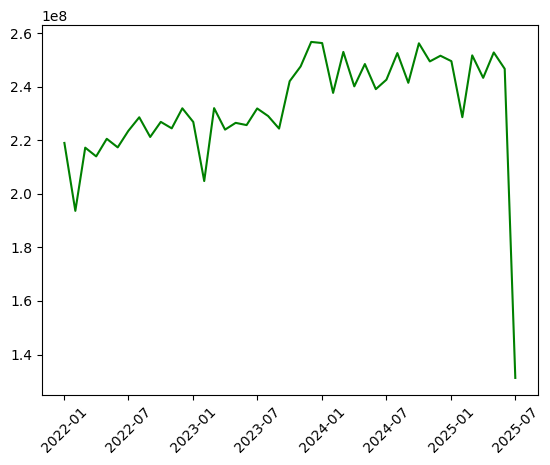

In [29]:
whole_by_month = df_feed[date_cols].sum()
plt.xticks(rotation=45)
sns.lineplot(data=whole_by_month, color="green")

In [30]:
df_feed[date_cols].describe()

,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
count,"4,281.000000","4,218.000000","4,206.000000","4,264.000000","4,316.000000","4,256.000000","4,185.000000","4,509.000000","4,594.000000","4,579.000000","4,562.000000","4,463.000000","4,430.000000","4,464.000000","4,480.000000","4,535.000000","4,643.000000","4,495.000000","4,453.000000","4,151.000000","4,265.000000","4,430.000000","4,316.000000","4,482.000000","4,360.000000","4,479.000000","4,385.000000","4,398.000000","4,245.000000","4,172.000000","4,302.000000","4,228.000000","4,250.000000","4,501.000000","4,321.000000","4,476.000000","4,282.000000","4,235.000000","4,281.000000","4,350.000000","4,289.000000","4,274.000000","1,991.000000"
mean,"51,149.208229","45,904.375452","51,642.339933","50,177.150378","51,092.230093","51,061.214373","53,394.662276","50,686.221250","48,149.368512","49,536.931768","49,192.635589","51,959.688775","51,195.701402","45,867.675974","51,776.028035","49,380.579663","48,776.703872","50,196.421908","52,063.383003","55,169.737099","52,596.685662","54,629.718971","57,348.999813","57,267.576465","58,772.419369","53,057.656229","57,683.513009","54,590.705411","58,520.031875","57,299.178772","56,386.050492","59,721.905154","56,804.400994","56,911.495118","57,718.264050","56,192.499364","58,264.228477","53,973.732340","58,783.152792","55,923.865606","58,927.244032","57,705.311027","65,933.200174"
std,"161,351.434070","140,378.859146","153,441.550259","159,660.853412","157,761.777435","164,200.740220","167,238.414957","168,496.118773","159,111.785883","148,388.304955","139,534.673978","144,348.148423","143,311.936528","127,519.658018","146,342.034643","144,728.173369","135,329.832559","140,860.247655","142,745.741563","148,101.115451","143,439.311793","152,111.367557","166,276.260802","167,758.472304","167,503.957974","151,968.357763","164,349.674072","157,166.501607","167,878.736204","164,672.784923","158,706.453727","174,462.385163","164,821.935275","171,951.648075","172,075.035233","164,803.477333","167,820.043851","158,584.024523","174,195.098696","167,713.461191","171,532.752093","169,215.686574","191,253.891198"
min,0.360000,0.230000,0.020000,0.020000,0.020000,0.100000,0.040000,0.350000,0.700000,0.693000,0.001000,0.350000,0.487000,0.102000,0.004000,0.101000,0.177000,0.180000,0.078000,0.507000,0.333000,0.377000,0.280000,0.243000,0.394000,0.322000,0.210000,0.071000,0.176000,0.378000,0.332000,0.011000,-26.600000,0.101000,1.000000,0.492000,1.000000,0.825000,0.350000,0.349000,0.118000,0.530000,0.092000
25%,"1,315.000000","1,000.250000","1,103.500000",980.750000,"1,124.346500","1,222.500000","1,234.837000","1,202.000000","1,200.000000","1,369.661500","1,437.542750","1,407.000000","1,417.000000","1,372.754500","1,372.350000","1,097.500000","1,091.500000","1,379.473500","1,485.000000","1,684.289500","1,682.000000","1,920.999250","1,783.690000","1,710.500000","1,683.600000","1,480.151500","1,730.000000","1,509.851500","1,558.362000","1,527.985750","1,556.000000","1,628.500000","1,540.000000","1,344.914000","1,743.000000","1,546.189500","1,826.818500","1,579.500000","1,620.000000","1,511.574000","1,689.000000","1,543.000000","2,132.500000"
50%,"6,880.000000","5,

In [38]:
df_feed[df_feed[date_cols[32]] == -26.6]

,organisation,farm_name,physiological_group_name,feed_name,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00
2964,Калужская Нива,(пусто),Д0 (Новотельные),Сода (натрий двууглекислый),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print("Самые частые корма:")
df_feed['feed_name'].value_counts().head(10)

Самые частые корма:


feed_name
Сенаж                         617
Силос                         564
Шрот рапсовый                 508
Жмых рапсовый                 477
Дробленое зерно (кукуруза)    448
Шрот соевый                   432
Солома (корма)                425
Шрот подсолнечный             390
Жом сухой                     380
Соль, кг                      366
Name: count, dtype: int64

In [46]:
food_amount_by_group = df_feed.groupby('physiological_group_name')[date_cols].sum().sum(axis=1).sort_values(ascending=False)
food_amount_by_group

physiological_group_name
Д1                          4,883,776,211.145000
Нетели                      1,066,182,936.684000
Д2                          1,019,657,628.816000
Т4 (>1 года)                  575,131,297.536000
Т3 (9-12 мес.)                558,382,919.001000
Т2 (6-8 мес.)                 378,130,502.336000
С1                            315,707,370.863000
С2                            257,105,906.127000
Д0 (Новотельные)              238,347,238.067000
Д3 (Предзапуск)               199,604,366.389000
Т1 (3-5 мес.)                 167,402,476.657000
Т0 (0-2 мес.)                 138,530,195.094000
Коровы подсосные группа       110,371,516.208000
Б0 (0-2 мес.)                  10,731,164.754000
МП БП (бык-производитель)      10,547,102.928000
МП ТР2 (>1 года рем.)           8,599,750.930000
МП Т1 (6-12 мес. откорм)        6,578,216.000000
МП ТР1 (6-12 мес. рем.)         5,126,431.467000
МП Т0 (0-6 мес.)                4,244,115.862000
Б1 (3-5 мес.)                   3,771,203.36

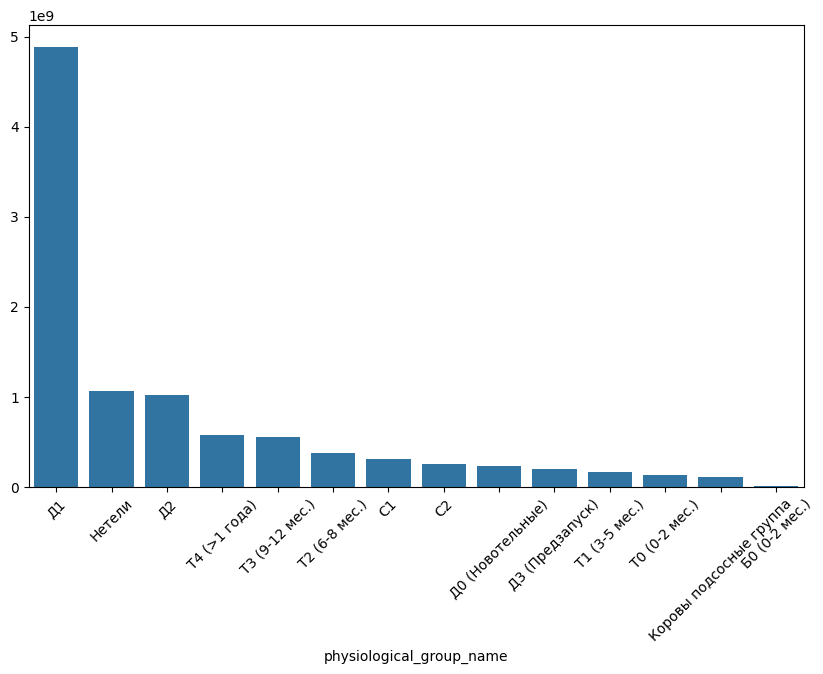

In [52]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=food_amount_by_group.head(14))
plt.xticks(rotation=45)
plt.show()